In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%load_ext autoreload
%autoreload 1

In [7]:
def relu(Z):
    cache = Z
    A = np.maximum(0, Z)
    return A, cache

def softmax(Z):
    cache = Z
    exp_Z = np.exp(Z)
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    return A, cache

def init_params(layer_dims):
    L = len(layer_dims)
    params = {}
    for l in range(1, L):
        params[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
        params[f'b{l}'] = np.zeros((layer_dims[l], 1))
    return params

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def linear_forward(A, W, b):
    Z = W.dot(A) + b
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, f):
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = f(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = - (1./m) * np.sum(Y * np.log(AL))
    cost = np.squeeze(cost)
    return cost

def linear_back(dZ, cache):
    A_prev, W, b = cache
    m = dZ.shape[1]
    dW = (1./m) * np.dot(dZ, A_prev.T)
    db = (1./m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

def linear_activation_back(dA, cache, f):
    linear_cache, activation_cache = cache
    dZ = f(dA, activation_cache)
    dA_prev, dW, db = linear_back(dZ, linear_cache)
    return dA_prev, dW, db

def update_params(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(L):
        params[f'W{l + 1}'] = params[f'W{l + 1}'] - learning_rate * grads[f'dW{l + 1}']
        params[f'b{l + 1}'] = params[f'b{l + 1}'] - learning_rate * grads[f'db{l + 1}']
    return params

def L_model_forward(X, params):
    caches = []
    A = X
    L = len(params) // 2
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, params[f'W{l}'], params[f'b{l}'], relu)
        caches.append(cache)

    AL, cache = linear_activation_forward(A, params[f'W{L}'], params[f'b{L}'], softmax)
    caches.append(cache)

    return AL, caches

def L_model_backward(AL, Y, caches):
    L = len(caches)
    grads = {}
    current_cache = caches[L - 1]
    dAL = AL - Y
    grads[f'dA{L - 1}'], grads[f'dW{L}'], grads[f'db{L}'] = linear_back(dAL, current_cache[0])

    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_back(grads[f"dA{l + 1}"], current_cache, relu_backward)
        grads[f"dA{l}"] = dA_prev_temp
        grads[f"dW{l + 1}"] = dW_temp
        grads[f"db{l + 1}"] = db_temp

    return grads

def L_layer_model(X, Y, layer_dims, learning_rate=.063, num_iter=3200, print_cost=False):
    costs = []
    L = len(layer_dims)
    params = init_params(layer_dims)
    for i in range(0, num_iter):
        AL, caches = L_model_forward(X, params)
        cost = compute_cost(AL, Y)
        costs.append(cost)
        if i % 100 == 0 and i != 0:
            print(f'Cost after iteration {i}: {cost}')
        grads = L_model_backward(AL, Y, caches)
        params = update_params(params, grads, learning_rate)
    
    return params, costs

def predict(X, Y, params):
    m = X.shape[1]
    probas, caches = L_model_forward(X, params)
    p = np.argmax(probas, axis = 0)
    if Y is not None:
        y = np.argmax(Y, axis = 0)
        accuracy = 1./m * np.sum(p == y)
        print(f"Accuracy: {accuracy}")
    return p

def one_hot(Y):
    m = len(Y)
    one_hot_Y = np.zeros((10, m))
    one_hot_Y[Y, np.arange(m)] = 1.
    return one_hot_Y

def visualize_example(train_X, train_Y, index):
    example = train_X[:, index]
    image = example.reshape((28, 28))
    plt.imshow(image)

In [4]:
train_data = pd.read_csv('train.csv')
train_data = np.array(train_data)

np.random.shuffle(train_data)

train_examples = train_data.T
m = train_examples.shape[1]

train_Y = train_examples[0]
train_Y = one_hot(train_Y)

train_X = train_examples[1:]
train_X = train_X / 255.

Cost after iteration 100: 0.21578486823810766
Cost after iteration 200: 0.13471921691913946
Cost after iteration 300: 0.10280102114785716
Cost after iteration 400: 0.08258435179373345
Cost after iteration 500: 0.06833770706034598
Cost after iteration 600: 0.05772516505009995
Cost after iteration 700: 0.049434068262298604
Cost after iteration 800: 0.042788027632309114
Cost after iteration 900: 0.037336319813459584
Cost after iteration 1000: 0.03279763827142079
Cost after iteration 1100: 0.028968907566927913
Cost after iteration 1200: 0.025705010660235325
Cost after iteration 1300: 0.0229239893852234
Cost after iteration 1400: 0.020531172431561155
Cost after iteration 1500: 0.018462623324116148
Cost after iteration 1600: 0.016669240531054508
Cost after iteration 1700: 0.015110765026072573
Cost after iteration 1800: 0.013750020252644437
Cost after iteration 1900: 0.012557526270023909
Cost after iteration 2000: 0.01150978718487106
Cost after iteration 2100: 0.010587035747654747
Cost after 

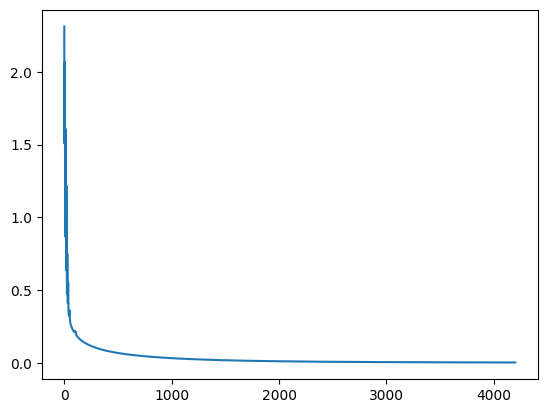

In [37]:
layer_dims = [784, 256, 10]
params, costs = L_layer_model(train_X, train_Y, layer_dims, learning_rate=1, num_iter=4200, print_cost = True)
plt.plot(costs)

In [38]:
pred_train = predict(train_X, train_Y, params)

Accuracy: 1.0


(784,)


NameError: name 'pred_train' is not defined

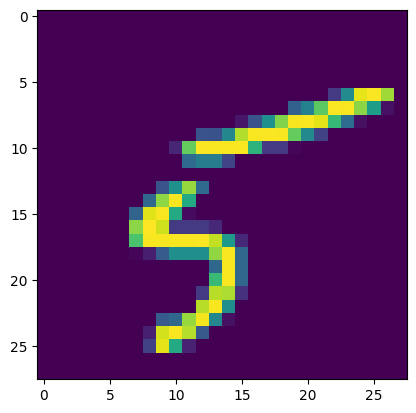

In [6]:
ind = 10001
visualize_example(train_X, train_Y, ind)

print(f"Predicted label: {pred_train[ind]}")

In [40]:
incorrect_labels = []
for i in range(m):
    correct_label = np.argmax(train_Y, axis=0)[i]
    predicted_label = pred_train[i]
    if predicted_label - correct_label != 0:
        incorrect_labels.append({
            'example': i,
            'correct_label': correct_label,
            'predicted_label': predicted_label
        })
if not incorrect_labels:
    print("All training examples are correctly labeled.")
else:
    misslables_count = len(incorrect_labels)
    print(f"Misslabeled examples: {misslables_count}/{m} ({misslables_count/m * 100} %)")

All training examples are correctly labeled.


In [41]:
print(m)
print(incorrect_labels)

42000
[]


In [42]:
test_data = pd.read_csv('test.csv')
test_data = np.array(test_data)

test_examples = test_data.T
test_X = test_examples / 255.

m = test_examples.shape[1]

In [43]:
pred_test = predict(test_X, None, params)

Predicted label: 3


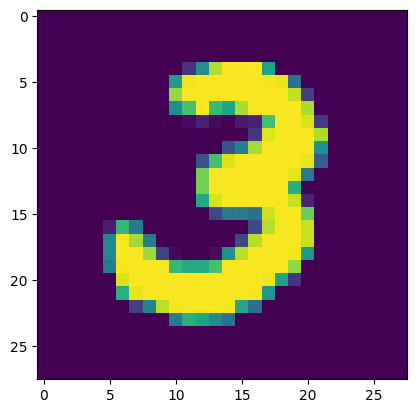

In [62]:
ind = 25555

visualize_example(test_X, [0], ind)
predicted_label = pred_test[ind]
print(f"Predicted label: {predicted_label}")

In [12]:
# Save test dataset predictions to file
with open("submission.csv", "w") as f:
    f.write("ImageId,Label\n")
    for i in range(m):
        f.write(f"{i + 1},{pred_test[i]}\n")

In [45]:
# Save params to file
with open("params_3L_784x256x10.json", "w") as f:
    temp_params = {}
    for key in params:
        temp_params[key] = params[key].tolist()
    json.dump(temp_params, f, indent=4)

In [5]:
# Load pretrained params from file
params = {}
with open("params_3L_784x256x10.json", "r") as f:
    temp_params = json.load(f)
    for key in temp_params:
        params[key] = np.array(temp_params[key])